In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split the training data into training and validation sets
split_index = int(len(x_train) * 0.8)
x_val = x_train[split_index:]
y_val = y_train[split_index:]
x_train = x_train[:split_index]
y_train = y_train[:split_index]

# Define the VGG16 model architecture
model = Sequential()

# Add convolutional layers
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))  # reduce size of last convolutional layer

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with an optimizer and loss function
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val), verbose=1)




Epoch 1/10
750/750 [==============================] - 36s 41ms/step - loss: 2.3032 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.0983
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/10
750/750 [==============================] - 30s 41ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 4/10
750/750 [==============================] - 30s 40ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/10
750/750 [==============================] - 31s 41ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 6/10
750/750 [==============================] - 31s 41ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/10
750/750 [==============================] - 31s 42ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy:

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 3s 11ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.302600860595703
Test accuracy: 0.10000000149011612


1/1 [==============================] - 1s 948ms/step
predict class: 8
expected class: 1.0


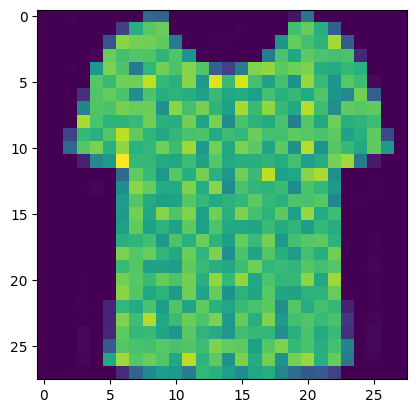

In [12]:
import matplotlib.pyplot as plt
model.save("keras-VGG16-cifar10.h5")
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
   if result[0][i] > result[0][predict]:
    predict = i
print("predict class:",predict)
print("expected class:",expect)

In [13]:
# save model
model.save("keras-VGG16-cifar10.h5")

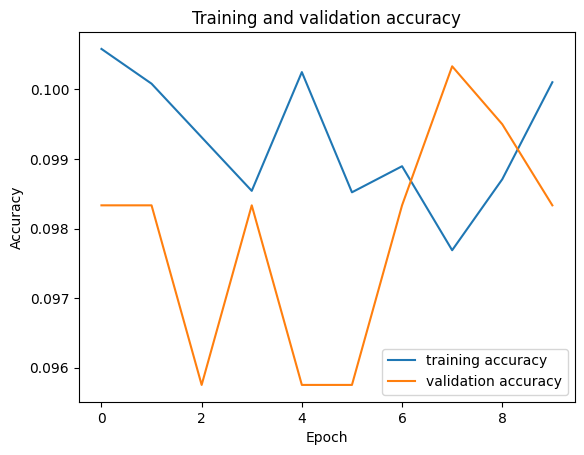

In [14]:
#plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

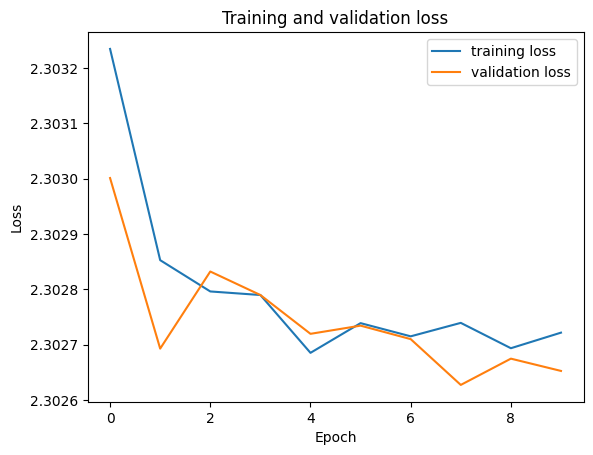

In [15]:
#plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()